In [1]:
import pandas as aju
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = aju.read_csv('D:\PYTHON CODINGS\MACHINE LEARNING\ML_00_PROGRAM FILES\DATASETS\ML_08_DecisionTree_CleavelandHeart.csv',header = None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.columns = ['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang',
              'oldpeak','slope','ca','thal','hd']

In [6]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [8]:
df.isna().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,hd
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [10]:
df.age.unique()

array([63., 67., 37., 41., 56., 62., 57., 53., 44., 52., 48., 54., 49.,
       64., 58., 60., 50., 66., 43., 40., 69., 59., 42., 55., 61., 65.,
       71., 51., 46., 45., 39., 68., 47., 34., 35., 29., 70., 77., 38.,
       74., 76.])

In [11]:
df.sex.unique()

array([1., 0.])

In [12]:
df.restbp.unique()

array([145., 160., 120., 130., 140., 172., 150., 110., 132., 117., 135.,
       112., 105., 124., 125., 142., 128., 170., 155., 104., 180., 138.,
       108., 134., 122., 115., 118., 100., 200.,  94., 165., 102., 152.,
       101., 126., 174., 148., 178., 158., 192., 129., 144., 123., 136.,
       146., 106., 156., 154., 114., 164.])

In [13]:
df.chol.unique()

array([233., 286., 229., 250., 204., 236., 268., 354., 254., 203., 192.,
       294., 256., 263., 199., 168., 239., 275., 266., 211., 283., 284.,
       224., 206., 219., 340., 226., 247., 167., 230., 335., 234., 177.,
       276., 353., 243., 225., 302., 212., 330., 175., 417., 197., 198.,
       290., 253., 172., 273., 213., 305., 216., 304., 188., 282., 185.,
       232., 326., 231., 269., 267., 248., 360., 258., 308., 245., 270.,
       208., 264., 321., 274., 325., 235., 257., 164., 141., 252., 255.,
       201., 222., 260., 182., 303., 265., 309., 307., 249., 186., 341.,
       183., 407., 217., 288., 220., 209., 227., 261., 174., 281., 221.,
       205., 240., 289., 318., 298., 564., 246., 322., 299., 300., 293.,
       277., 214., 207., 223., 160., 394., 184., 315., 409., 244., 195.,
       196., 126., 313., 259., 200., 262., 215., 228., 193., 271., 210.,
       327., 149., 295., 306., 178., 237., 218., 242., 319., 166., 180.,
       311., 278., 342., 169., 187., 157., 176., 24

In [14]:
df.fbs.unique()

array([1., 0.])

In [15]:
df.restecg.unique()

array([2., 0., 1.])

In [16]:
df.thalach.unique()

array([150., 108., 129., 187., 172., 178., 160., 163., 147., 155., 148.,
       153., 142., 173., 162., 174., 168., 139., 171., 144., 132., 158.,
       114., 151., 161., 179., 120., 112., 137., 157., 169., 165., 123.,
       128., 152., 140., 188., 109., 125., 131., 170., 113.,  99., 177.,
       141., 180., 111., 143., 182., 156., 115., 149., 145., 146., 175.,
       186., 185., 159., 130., 190., 136.,  97., 127., 154., 133., 126.,
       202., 103., 166., 164., 184., 124., 122.,  96., 138.,  88., 105.,
       194., 195., 106., 167.,  95., 192., 117., 121., 116.,  71., 118.,
       181., 134.,  90.])

In [17]:
df.hd.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [18]:
df.slope.unique()

array([3., 2., 1.])

In [19]:
df.oldpeak.unique()

array([2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 3.1, 0.4, 1.3, 0. , 0.5,
       1.6, 1. , 1.2, 0.2, 1.8, 3.2, 2.4, 2. , 2.5, 2.2, 2.8, 3. , 3.4,
       6.2, 4. , 5.6, 2.9, 0.1, 2.1, 1.9, 4.2, 0.9, 1.1, 3.8, 0.7, 0.3,
       4.4])

In [20]:
df.exang.unique()

array([0., 1.])

In [21]:
df.ca.unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [22]:
df.thal.unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [23]:
len(df[df.thal == '?'])

2

In [24]:
len(df[df.ca == '?'])

4

In [25]:
df1 = df[(df.ca != '?')&(df.thal != '?')]

In [26]:
df1.shape

(297, 14)

In [27]:
x = df1.drop('hd',axis = 'columns')
y = df1.hd

In [28]:
x

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [29]:
y

0      0
1      2
2      1
3      0
4      0
      ..
297    1
298    1
299    2
300    3
301    1
Name: hd, Length: 297, dtype: int64

In [30]:
x.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [31]:
x.cp.unique()

array([1., 4., 3., 2.])

In [32]:
df2 = aju.get_dummies(x, columns=['cp', 'restecg', 'slope', 'thal'])

df3 = df2.apply(lambda col: col.astype(int) if set(col.unique()) <= {0, 1, 0.0, 1.0, '0.0', '1.0'} else col)


In [33]:
df3.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1,145.0,233.0,1,150.0,0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1,160.0,286.0,0,108.0,1,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1,120.0,229.0,0,129.0,1,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1,130.0,250.0,0,187.0,0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0,130.0,204.0,0,172.0,0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [34]:
df3.columns

Index(['age', 'sex', 'restbp', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_0.0',
       'restecg_1.0', 'restecg_2.0', 'slope_1.0', 'slope_2.0', 'slope_3.0',
       'thal_3.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')

In [35]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [36]:
y_not_zero = y>0
y[y_not_zero] = 1
y.unique()

array([0, 1], dtype=int64)

In [37]:
x_train,x_test,y_train,y_test = train_test_split(df3,y,random_state = 99)

In [38]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(222, 22) (222,) (75, 22) (75,)


In [39]:
clf = DecisionTreeClassifier(random_state = 99)
clf_dt = clf.fit(x_train,y_train)

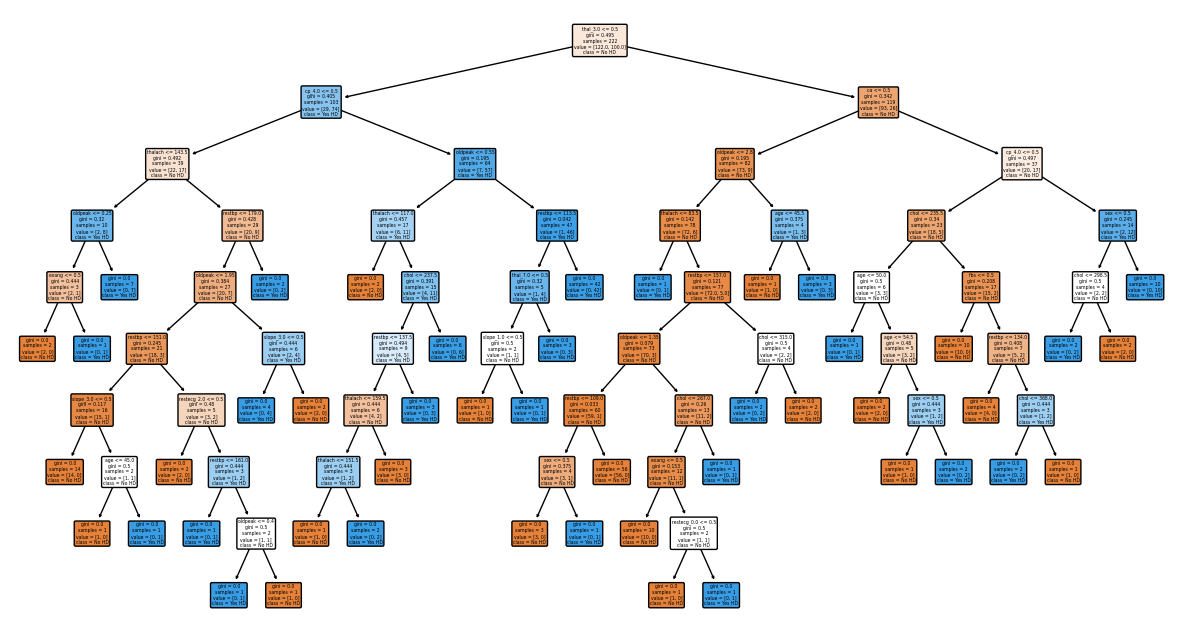

In [40]:
plt.figure(figsize = (15,8))
plot_tree(clf_dt,filled = True,rounded = True,class_names = ['No HD','Yes HD'],
         feature_names = df3.columns)
plt.show()

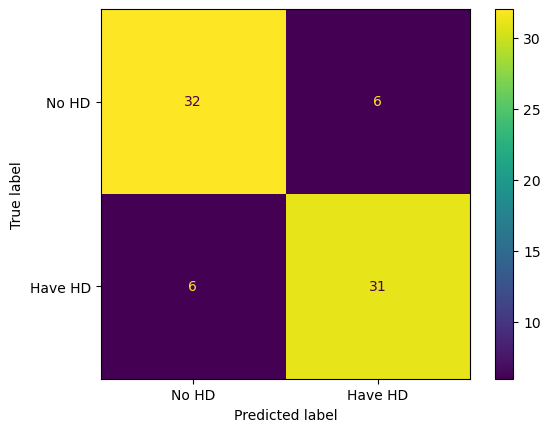

In [41]:
ConfusionMatrixDisplay.from_estimator(clf_dt,x_test,y_test,display_labels = ['No HD','Have HD'])

In [42]:
y_pred = clf_dt.predict(x_test)

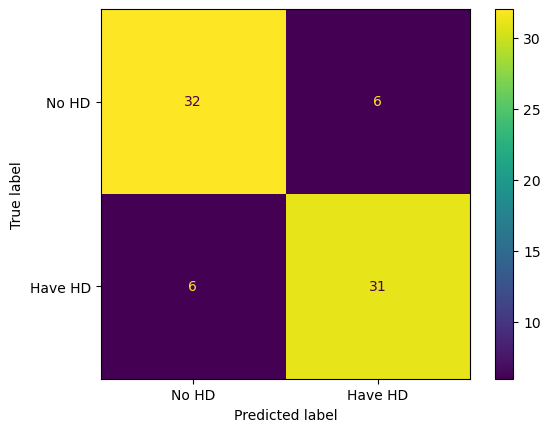

In [43]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels = ['No HD','Have HD'])

In [44]:
path  = clf_dt.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha = path.ccp_alphas

In [45]:
ccp_alpha

array([0.        , 0.00293911, 0.003003  , 0.00412913, 0.00422297,
       0.00435704, 0.00441452, 0.0045045 , 0.00529942, 0.00584088,
       0.00600601, 0.00600601, 0.00675676, 0.00720721, 0.00772201,
       0.00799324, 0.00840841, 0.00854973, 0.01091732, 0.01237206,
       0.01552913, 0.01606169, 0.0300892 , 0.04514264, 0.12433041])

In [46]:
ccp_alphas = ccp_alpha[:-1]
ccp_alphas

array([0.        , 0.00293911, 0.003003  , 0.00412913, 0.00422297,
       0.00435704, 0.00441452, 0.0045045 , 0.00529942, 0.00584088,
       0.00600601, 0.00600601, 0.00675676, 0.00720721, 0.00772201,
       0.00799324, 0.00840841, 0.00854973, 0.01091732, 0.01237206,
       0.01552913, 0.01606169, 0.0300892 , 0.04514264])

In [47]:
clf_dts = []
for i in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 99 ,ccp_alpha = i)
    clf_dt.fit(x_train,y_train)
    clf_dts.append(clf_dt)

In [53]:
train_scores = [clf_dt.score(x_train,y_train) for clf_dt in clf_dts]

In [55]:
train_scores

[1.0,
 0.9954954954954955,
 0.990990990990991,
 0.9864864864864865,
 0.9819819819819819,
 0.9774774774774775,
 0.9684684684684685,
 0.954954954954955,
 0.9459459459459459,
 0.9459459459459459,
 0.9324324324324325,
 0.9324324324324325,
 0.9279279279279279,
 0.918918918918919,
 0.9099099099099099,
 0.8963963963963963,
 0.8918918918918919,
 0.8828828828828829,
 0.8558558558558559,
 0.8558558558558559,
 0.8468468468468469,
 0.8198198198198198,
 0.7747747747747747,
 0.7522522522522522]

In [57]:
test_scores = [clf_dt.score(x_test,y_test) for clf_dt in clf_dts]
test_scores

[0.84,
 0.84,
 0.84,
 0.84,
 0.84,
 0.84,
 0.8533333333333334,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8533333333333334,
 0.84,
 0.84,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.84,
 0.8133333333333334,
 0.76,
 0.8]

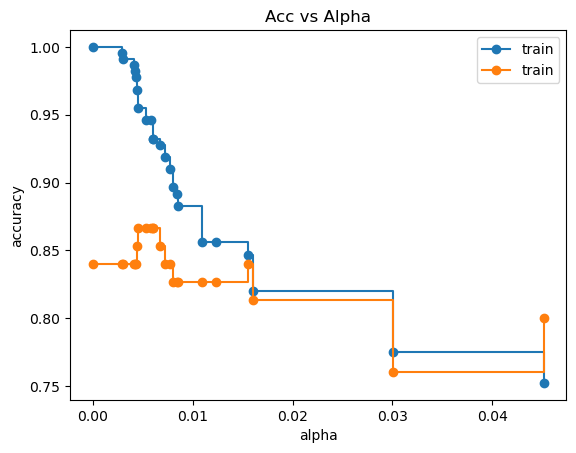

In [61]:
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Acc vs Alpha')
ax.plot(ccp_alphas,train_scores,marker = 'o',label = 'train',drawstyle = 'steps-post')
ax.plot(ccp_alphas,test_scores,marker = 'o',label = 'train',drawstyle = 'steps-post')
ax.legend()
plt.show()

In [63]:
clf_dt = DecisionTreeClassifier(random_state = 99,ccp_alpha = 0.016)
scores = cross_val_score(clf_dt,x_train,y_train,cv = 5)
scores

array([0.64444444, 0.8       , 0.81818182, 0.65909091, 0.70454545])

<Axes: xlabel='tree'>

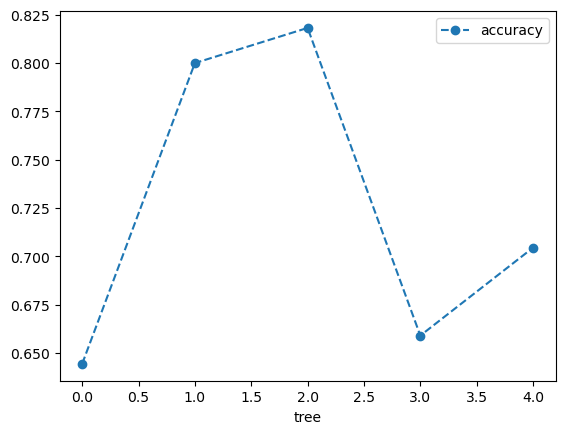

In [69]:
df5 = aju.DataFrame(data = {'tree':range (5),'accuracy':scores})
df5.plot(x='tree',y='accuracy',marker = 'o',linestyle='--')

In [73]:
alpha_loop_values = []
for i in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 99, ccp_alpha = i)
    scores = cross_val_score(clf_dt,x_train,y_train,cv = 5)
    alpha_loop_values.append([i,np.mean(scores),np.std(scores)])

alpha_res = aju.DataFrame(alpha_loop_values,columns=['alpha','mean_acc','std'])
alpha_res

,alpha,mean_acc,std
0,0.000000,0.702525,0.042056
1,0.002939,0.702525,0.042056
2,0.003003,0.702525,0.042056
3,0.004129,0.702525,0.042056
4,0.004223,0.702525,0.042056
5,0.004357,0.702525,0.042056
6,0.004415,0.702525,0.042056
7,0.004505,0.702525,0.042056
8,0.005299,0.711616,0.036188
9,0.005841,0.720505,0.040207


<Axes: xlabel='alpha'>

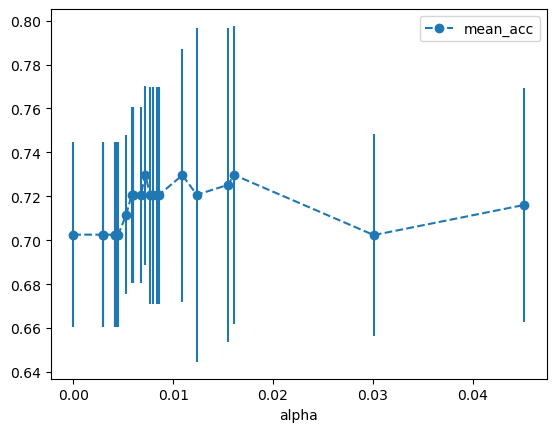

In [83]:
alpha_res.plot(x= 'alpha',y = 'mean_acc',yerr = 'std',marker = 'o',linestyle = '--')


In [90]:
alpha_res[(alpha_res['alpha']>0.012)&(alpha_res['alpha']<0.015)]

,alpha,mean_acc,std
19,0.012372,0.720707,0.076131


In [102]:
ideal_cpp = alpha_res[(alpha_res['alpha']>0.012)&(alpha_res['alpha']<0.015)]['alpha']

In [108]:
ideal_cpp = float(ideal_cpp)
ideal_cpp

0.012372059951064954

In [110]:
clf_prune = DecisionTreeClassifier(random_state = 99,ccp_alpha = ideal_cpp)
clf_prune.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.012372059951064954, random_state=99)

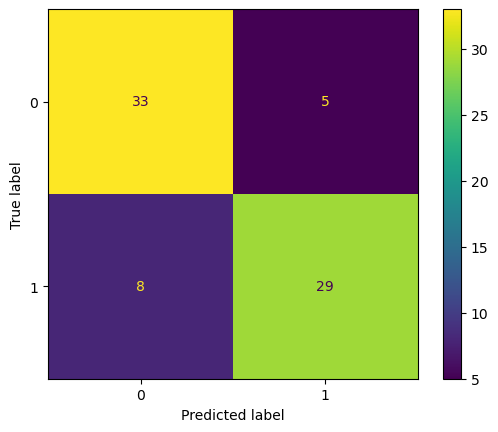

In [112]:
ConfusionMatrixDisplay.from_estimator(clf_prune,x_test,y_test)

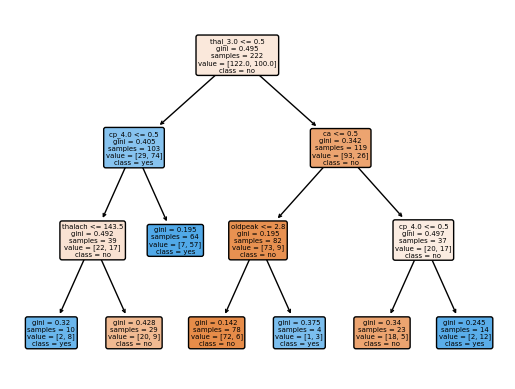

In [118]:
plot_tree(clf_prune,filled= True,rounded = True,class_names=['no','yes'],feature_names = x_train.columns)
plt.show()